In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
coordinates

[(-42.04033606866131, -106.19917109799187),
 (-80.87353611545615, 27.041371047849736),
 (-45.976908042434424, -163.598978694025),
 (-86.39113845961053, 131.89823448099446),
 (36.4804208685173, -130.32839204484003),
 (5.529719483308028, -90.2319989551346),
 (45.82558550485561, -66.35640803987019),
 (79.39678856464732, 162.87560680612984),
 (20.4144865923453, -83.14633717677928),
 (-56.302268429391, 79.57722917925656),
 (24.787723259404657, 74.67392252491337),
 (29.324788966039378, 136.78516928397408),
 (28.41011020848788, -156.08083876366442),
 (75.83589750044905, 140.04238228148301),
 (-15.349431357217341, 128.52344415293658),
 (-64.46345833383927, -107.92383403052919),
 (-49.465495043457125, 78.77162628552924),
 (-20.5096155377216, -15.01420399183263),
 (-58.63496720248443, -61.432093664654815),
 (1.9324559086339974, 38.8677168029987),
 (-55.47504667522274, -7.688562650729324),
 (62.947385861803355, 84.33291588145966),
 (-63.13150713564793, -26.08832388481477),
 (29.7008556579938, -52

In [5]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [6]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

ancud cl
bredasdorp za
avarua ck
hobart au
fortuna us
puerto ayora ec
oromocto ca
cherskiy ru
santa fe cu
mahebourg mu
chittaurgarh in
shingu jp
kapaa us
nizhneyansk ru
kununurra au
punta arenas cl
mahebourg mu
jamestown sh
ushuaia ar
marsabit ke
cape town za
krasnoselkup ru
chuy uy
saint george bm
rikitea pf
thompson ca
taolanaro mg
rikitea pf
paradwip in
waingapu id
deer lake ca
cape town za
sangar ru
lebu cl
tuatapere nz
dunedin nz
maragogi br
chokurdakh ru
punta arenas cl
bambous virieux mu
kapaa us
ampanihy mg
green river us
burnie au
pangnirtung ca
klyuchi ru
butaritari ki
faanui pf
provideniya ru
praya id
mahebourg mu
iqaluit ca
kapaa us
mataura pf
georgetown sh
samusu ws
sabha ly
komsomolskiy ru
gadwal in
cherskiy ru
mackay au
katsuura jp
ushuaia ar
blagoveshchensk ru
barrow us
wembley ca
carberry ca
urucui br
new norfolk au
bethel us
barra do garcas br
shingu jp
kitimat ca
ribeira grande pt
bemidji us
qasigiannguit gl
vardo no
sao filipe cv
mys shmidta ru
atuona pf
avarua ck
b

xiuyan cn
avarua ck
nhulunbuy au
tasiilaq gl
cape town za
marawi sd
barrow us
samusu ws
punta arenas cl
carnarvon au
ushuaia ar
qaqortoq gl
kolpashevo ru
cape town za
atar mr
punta arenas cl
albany au
busselton au
komsomolskiy ru
ribeira grande pt
kurbnesh al
new norfolk au
roma au
new norfolk au
mehamn no
luderitz na
hithadhoo mv
burkhala ru
qaanaaq gl
macheng cn
dwarka in
barentsburg sj
yantal ru
qaanaaq gl
rikitea pf
victoria sc
itoman jp
bluff nz
tuktoyaktuk ca
kodiak us
bambous virieux mu
bellevue us
lima pe
grindavik is
nikolskoye ru
albany au
burnie au
pocoes br
sibolga id
ushuaia ar
ilo pe
aksarka ru
butaritari ki
upernavik gl
tasiilaq gl
manaure co
cape town za
ostrovnoy ru
constitucion mx
poltavka ru
mys shmidta ru
bredasdorp za
hilo us
veinticinco de mayo ar
jamestown sh
pandan ph
hilo us
kenai us
illoqqortoormiut gl
victor harbor au
taolanaro mg
sioux lookout ca
salinopolis br
saint george bm
new norfolk au
atuona pf
severo-kurilsk ru
punta arenas cl
jamestown sh
rikitea pf

In [7]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

616

In [8]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [9]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3fd2dc471432be33e15e8ac3bd7df85b


In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ancud
Processing Record 2 of Set 1 | bredasdorp
Processing Record 3 of Set 1 | avarua
Processing Record 4 of Set 1 | hobart
Processing Record 5 of Set 1 | fortuna
Processing Record 6 of Set 1 | puerto ayora
Processing Record 7 of Set 1 | oromocto
Processing Record 8 of Set 1 | cherskiy
Processing Record 9 of Set 1 | santa fe
Processing Record 10 of Set 1 | mahebourg
Processing Record 11 of Set 1 | chittaurgarh
Processing Record 12 of Set 1 | shingu
Processing Record 13 of Set 1 | kapaa
Processing Record 14 of Set 1 | nizhneyansk
City not found. Skipping...
Processing Record 15 of Set 1 | kununurra
Processing Record 16 of Set 1 | punta arenas
Processing Record 17 of Set 1 | jamestown
Processing Record 18 of Set 1 | ushuaia
Processing Record 19 of Set 1 | marsabit
Processing Record 20 of Set 1 | cape town
Processing Record 21 of Set 1 | krasnoselkup
Processing Record 22 of Set 1 | chuy
Processing R

Processing Record 38 of Set 4 | ambilobe
Processing Record 39 of Set 4 | bengkulu
Processing Record 40 of Set 4 | abu dhabi
Processing Record 41 of Set 4 | bayan
Processing Record 42 of Set 4 | inhambane
Processing Record 43 of Set 4 | genhe
Processing Record 44 of Set 4 | andenes
Processing Record 45 of Set 4 | forbes
Processing Record 46 of Set 4 | umm kaddadah
Processing Record 47 of Set 4 | bjerkvik
Processing Record 48 of Set 4 | todos santos
Processing Record 49 of Set 4 | haines junction
Processing Record 50 of Set 4 | mehran
Processing Record 1 of Set 5 | urzhum
Processing Record 2 of Set 5 | kenai
Processing Record 3 of Set 5 | alofi
Processing Record 4 of Set 5 | jutai
Processing Record 5 of Set 5 | vila franca do campo
Processing Record 6 of Set 5 | turka
Processing Record 7 of Set 5 | winnemucca
Processing Record 8 of Set 5 | divo
Processing Record 9 of Set 5 | arraial do cabo
Processing Record 10 of Set 5 | yellowknife
Processing Record 11 of Set 5 | bintulu
Processing Rec

Processing Record 29 of Set 8 | mehamn
Processing Record 30 of Set 8 | burkhala
City not found. Skipping...
Processing Record 31 of Set 8 | macheng
Processing Record 32 of Set 8 | dwarka
Processing Record 33 of Set 8 | yantal
Processing Record 34 of Set 8 | victoria
Processing Record 35 of Set 8 | itoman
Processing Record 36 of Set 8 | bellevue
Processing Record 37 of Set 8 | lima
Processing Record 38 of Set 8 | grindavik
Processing Record 39 of Set 8 | pocoes
Processing Record 40 of Set 8 | sibolga
Processing Record 41 of Set 8 | ilo
Processing Record 42 of Set 8 | aksarka
Processing Record 43 of Set 8 | manaure
Processing Record 44 of Set 8 | poltavka
Processing Record 45 of Set 8 | veinticinco de mayo
Processing Record 46 of Set 8 | victor harbor
Processing Record 47 of Set 8 | sioux lookout
Processing Record 48 of Set 8 | san quintin
Processing Record 49 of Set 8 | homer
Processing Record 50 of Set 8 | san patricio
Processing Record 1 of Set 9 | moron
Processing Record 2 of Set 9 |

Processing Record 17 of Set 12 | asau
Processing Record 18 of Set 12 | maseru
Processing Record 19 of Set 12 | kozhva
Processing Record 20 of Set 12 | koutiala
Processing Record 21 of Set 12 | gillette
Processing Record 22 of Set 12 | fomboni
Processing Record 23 of Set 12 | asfi
Processing Record 24 of Set 12 | valentin gomez farias
Processing Record 25 of Set 12 | leon
Processing Record 26 of Set 12 | santa ines
Processing Record 27 of Set 12 | sedelnikovo
City not found. Skipping...
Processing Record 28 of Set 12 | hellin
Processing Record 29 of Set 12 | ekibastuz
Processing Record 30 of Set 12 | winneba
Processing Record 31 of Set 12 | havelock
Processing Record 32 of Set 12 | gazimurskiy zavod
Processing Record 33 of Set 12 | port hedland
Processing Record 34 of Set 12 | angra
City not found. Skipping...
Processing Record 35 of Set 12 | brisbane
Processing Record 36 of Set 12 | oarai
Processing Record 37 of Set 12 | isangel
Processing Record 38 of Set 12 | toora-khem
Processing Re

In [11]:
len(city_data)

569

In [12]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ancud,-41.8697,-73.8203,38.73,80,40,4.94,CL,2021-12-02 08:08:11
1,Bredasdorp,-34.5322,20.0403,59.29,57,57,13.60,ZA,2021-12-02 08:08:11
2,Avarua,-21.2078,-159.7750,77.05,88,40,18.41,CK,2021-12-02 08:03:20
3,Hobart,-42.8794,147.3294,63.27,93,75,1.99,AU,2021-12-02 08:08:12
4,Fortuna,40.5982,-124.1573,51.98,70,90,0.00,US,2021-12-02 08:08:12
5,Puerto Ayora,-0.7393,-90.3518,67.60,90,21,7.45,EC,2021-12-02 08:08:13
6,Oromocto,45.8351,-66.4792,21.94,92,50,5.01,CA,2021-12-02 08:08:13
7,Cherskiy,68.7500,161.3000,-33.18,98,29,6.02,RU,2021-12-02 08:08:13
8,Santa Fe,-31.6333,-60.7000,66.02,74,0,1.99,AR,2021-12-02 08:05:05
9,Mahebourg,-20.4081,57.7000,85.24,71,21,14.52,MU,2021-12-02 08:08:14


In [13]:
#reorder columns
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

#assign df with new column order
city_data_df = city_data_df[new_column_order]

city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Ancud,CL,2021-12-02 08:08:11,-41.8697,-73.8203,38.73,80,40,4.94
1,Bredasdorp,ZA,2021-12-02 08:08:11,-34.5322,20.0403,59.29,57,57,13.60
2,Avarua,CK,2021-12-02 08:03:20,-21.2078,-159.7750,77.05,88,40,18.41
3,Hobart,AU,2021-12-02 08:08:12,-42.8794,147.3294,63.27,93,75,1.99
4,Fortuna,US,2021-12-02 08:08:12,40.5982,-124.1573,51.98,70,90,0.00


In [14]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [15]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

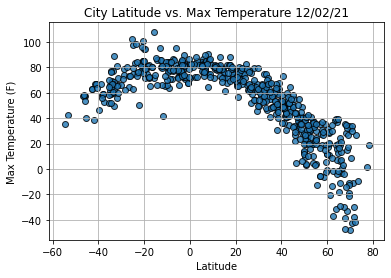

In [16]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

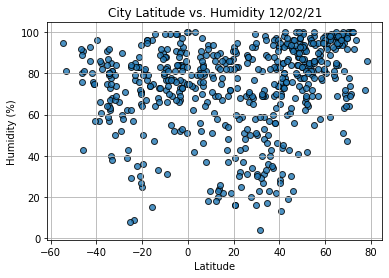

In [17]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

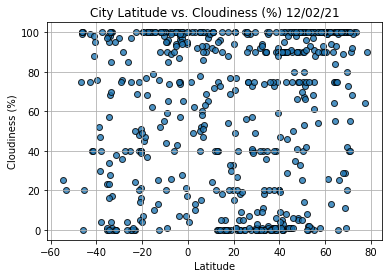

In [18]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

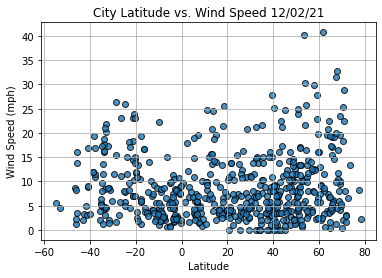

In [19]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [21]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [23]:
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Ancud,CL,2021-12-02 08:08:11,-41.8697,-73.8203,38.73,80,40,4.94
1,Bredasdorp,ZA,2021-12-02 08:08:11,-34.5322,20.0403,59.29,57,57,13.60
2,Avarua,CK,2021-12-02 08:03:20,-21.2078,-159.7750,77.05,88,40,18.41
3,Hobart,AU,2021-12-02 08:08:12,-42.8794,147.3294,63.27,93,75,1.99
4,Fortuna,US,2021-12-02 08:08:12,40.5982,-124.1573,51.98,70,90,0.00
...,...,...,...,...,...,...,...,...,...
564,High Rock,BS,2021-12-02 08:23:36,26.6208,-78.2833,64.42,71,1,10.78
565,Guadalupe,MX,2021-12-02 08:23:37,25.6833,-100.2500,76.39,85,90,0.00
566,Cuamba,MZ,2021-12-02 08:23:37,-14.8031,36.5372,87.37,47,10,7.92
567,Stupino,RU,2021-12-02 08:18:46,54.9008,38.0708,22.75,86,61,9.89


In [25]:
index13 = city_data_df.loc[13]
index13

City                    Kununurra
Country                        AU
Date          2021-12-02 08:05:30
Lat                      -15.7667
Lng                      128.7333
Max Temp                   107.58
Humidity                       15
Cloudiness                     62
Wind Speed                   4.61
Name: 13, dtype: object

In [26]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
4,Fortuna,US,2021-12-02 08:08:12,40.5982,-124.1573,51.98,70,90,0.00
6,Oromocto,CA,2021-12-02 08:08:13,45.8351,-66.4792,21.94,92,50,5.01
7,Cherskiy,RU,2021-12-02 08:08:13,68.7500,161.3000,-33.18,98,29,6.02
10,Chittaurgarh,IN,2021-12-02 08:08:14,24.8833,74.6333,66.24,44,100,7.43
11,Shingu,JP,2021-12-02 08:08:15,33.7333,135.9833,46.45,69,0,4.52


In [27]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

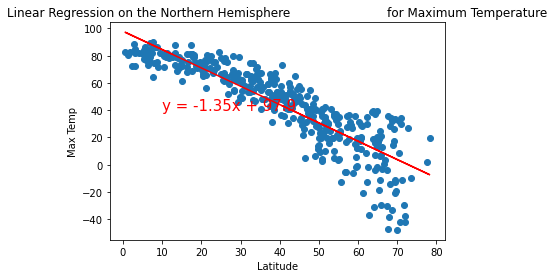

In [28]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

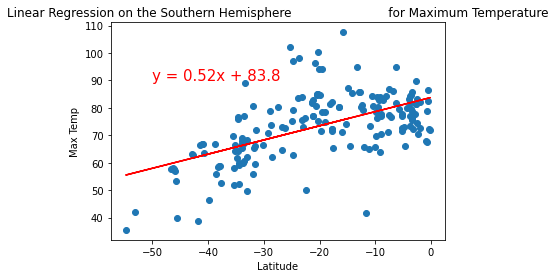

In [30]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

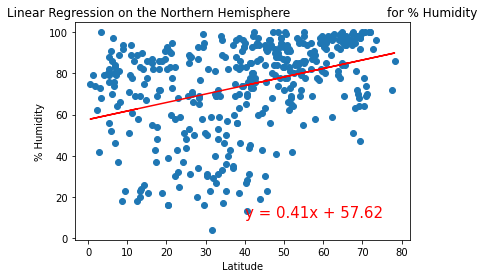

In [31]:
# Linear regression on the Northern Hemisphere - lat vs humidity
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

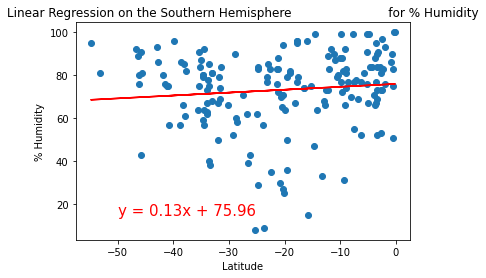

In [33]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

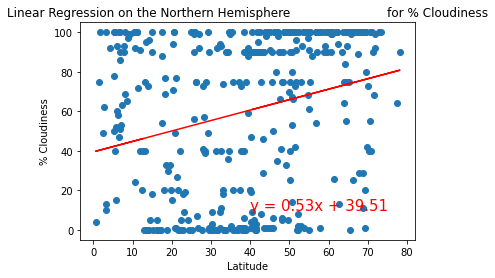

In [34]:
# Linear regression on the Northern Hemisphere - lat vs humidity
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,10))

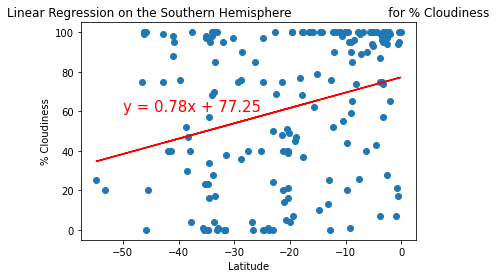

In [35]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))


In [38]:
# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print(f"The r-value is: {r_value:.3f}")

y = 0.78x + 77.25
The r-value is: 0.287


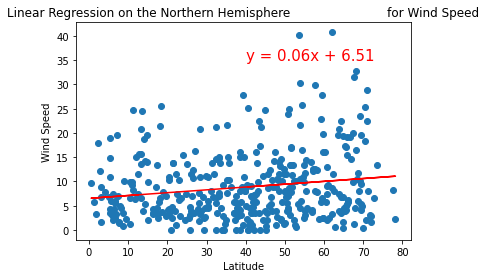

In [40]:
# Linear regression on the Northern Hemisphere - wind speed
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

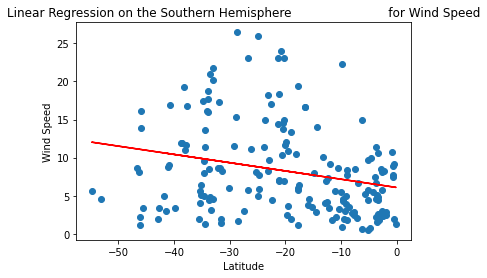

In [41]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))